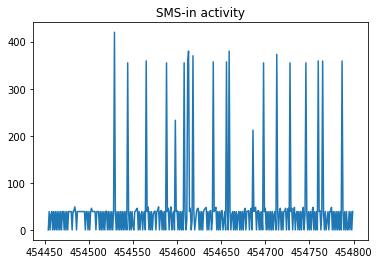

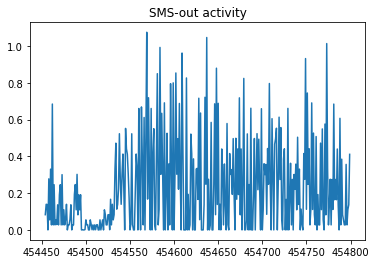

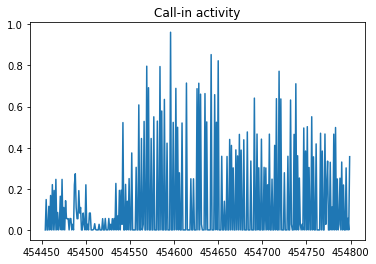

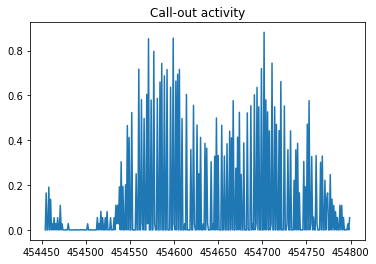

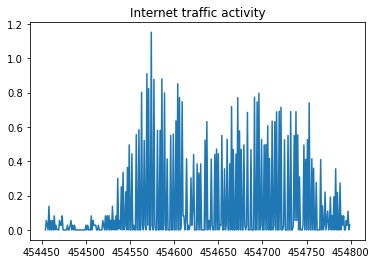

In [21]:

import pandas as pd
import matplotlib.pyplot as plt
colnames = ["Square_id",
            "Time Interval",
            "SMS-in activity",
           "SMS-out activity",
           "Call-in activity",
           "Call-out activity",
           "Internet traffic activity",
           "Country code"]
df = pd.read_csv("./italy/dataverse_files/sms-call-internet-mi-2013-11-01.txt", sep='\t',names=colnames)
# region_list = df.pivot_table(columns=['region'], aggfunc='size')
# df.pivot_table(columns=['name'], aggfunc='size')
# df.to_csv("./dataverse_files/CSV/MRRJ_ordinary_mobility_given_by_two_calls_fixed_expansion.csv")

df = df.fillna(value=0)



for i in range(2,7):
    
    plt.plot(df[df["Square_id"]==2].iloc[:,i])
    plt.title(df.columns[i])
    plt.show()
    
    


In [24]:
df.pivot_table(columns=['Square_id'], aggfunc='size').keys()

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
             9991,  9992,  9993,  9994,  9995,  9996,  9997,  9998,  9999,
            10000],
           dtype='int64', name='Square_id', length=10000)

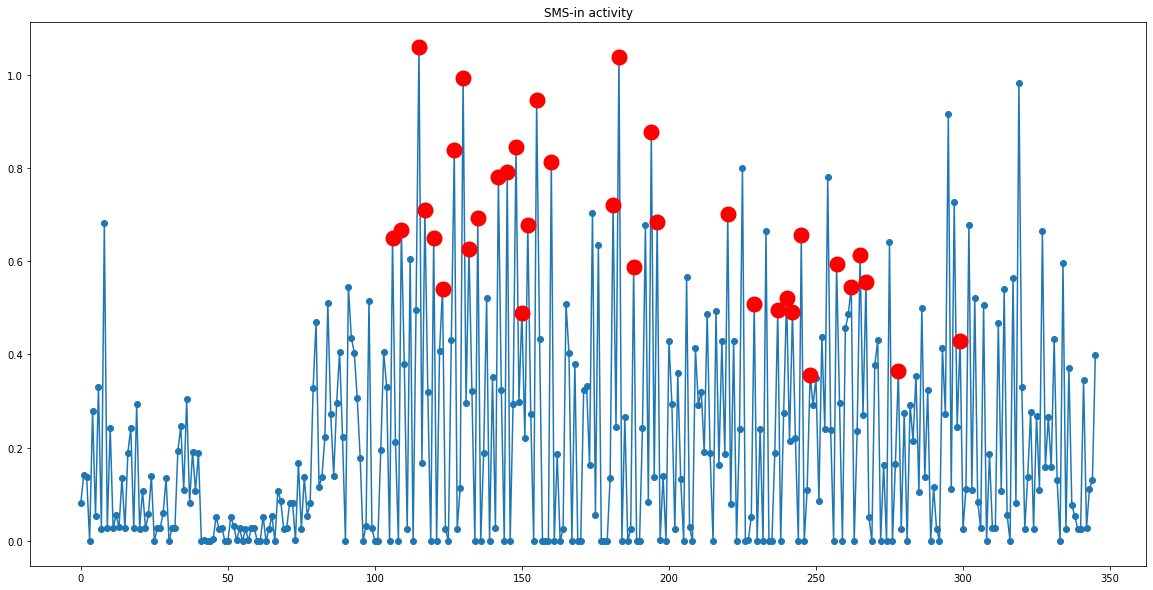

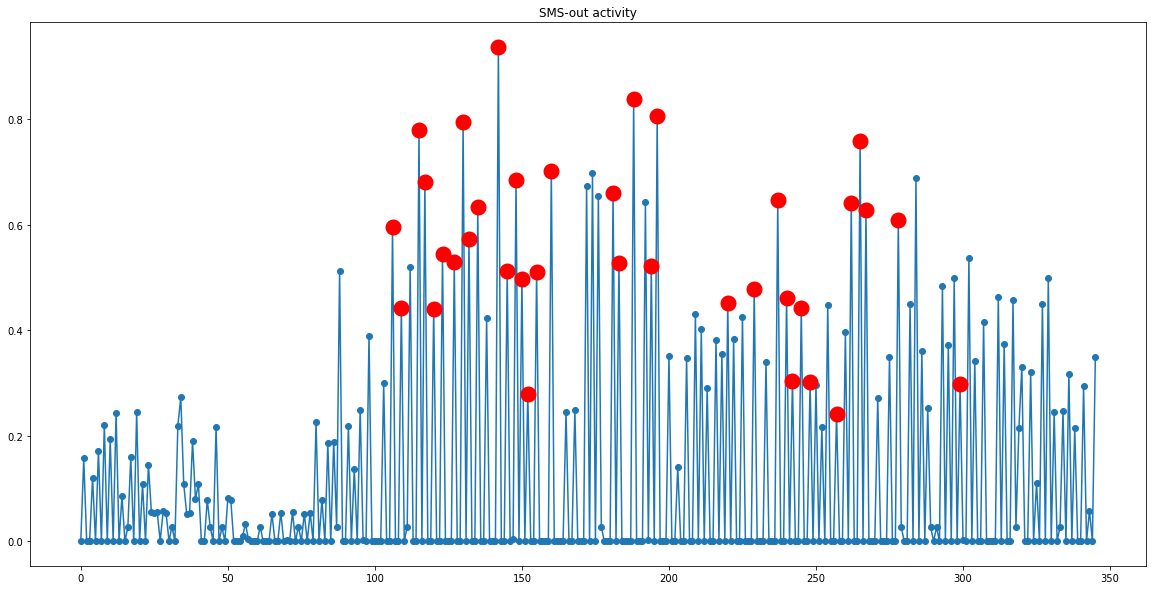

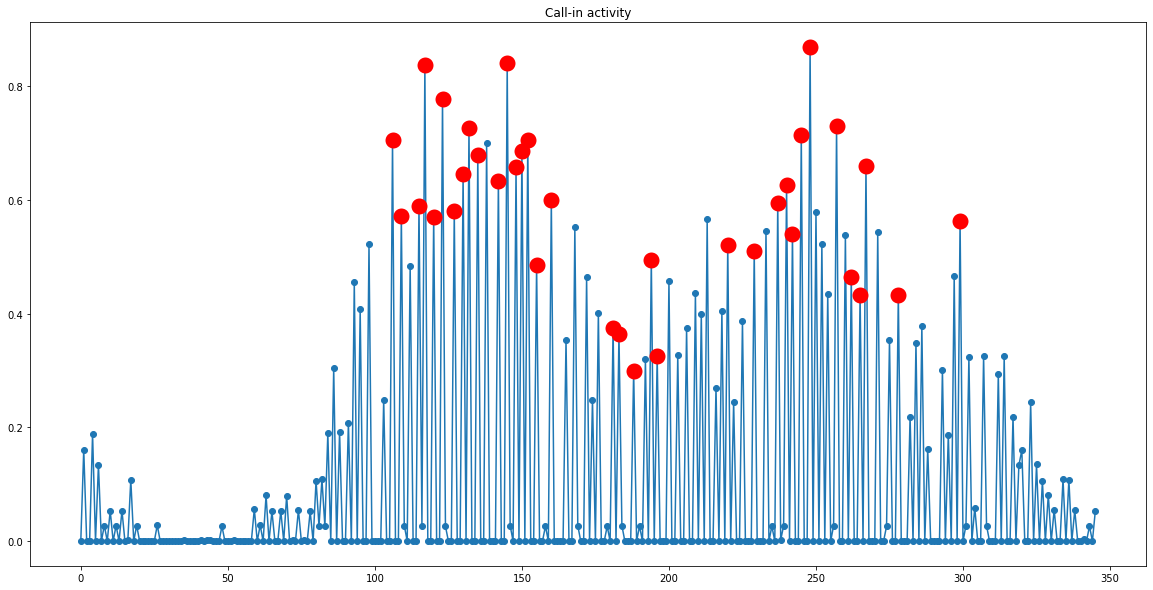

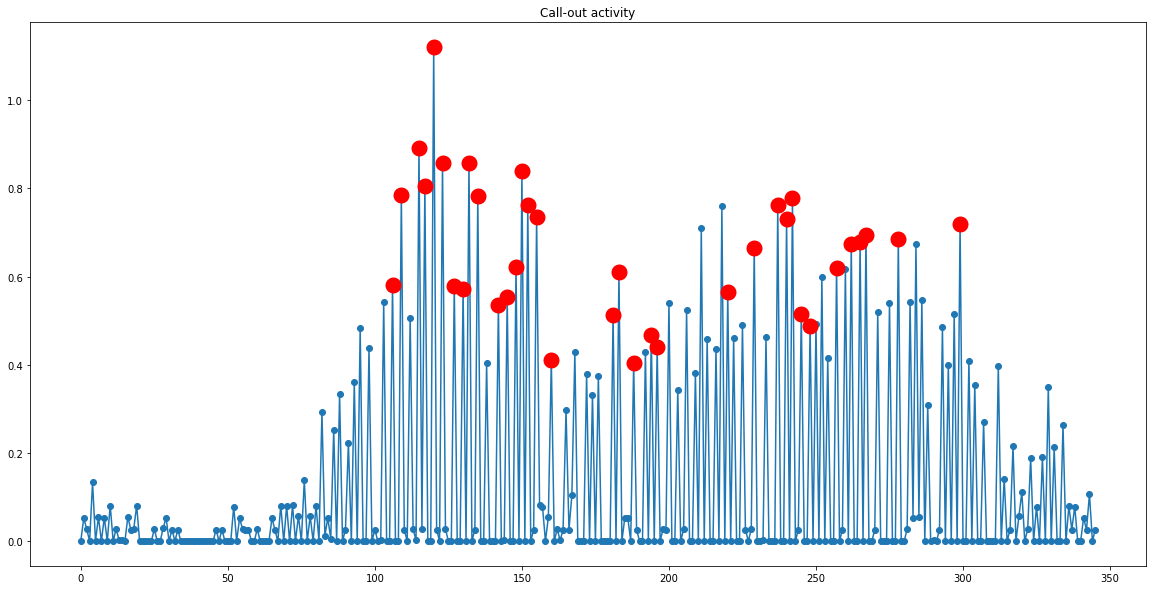

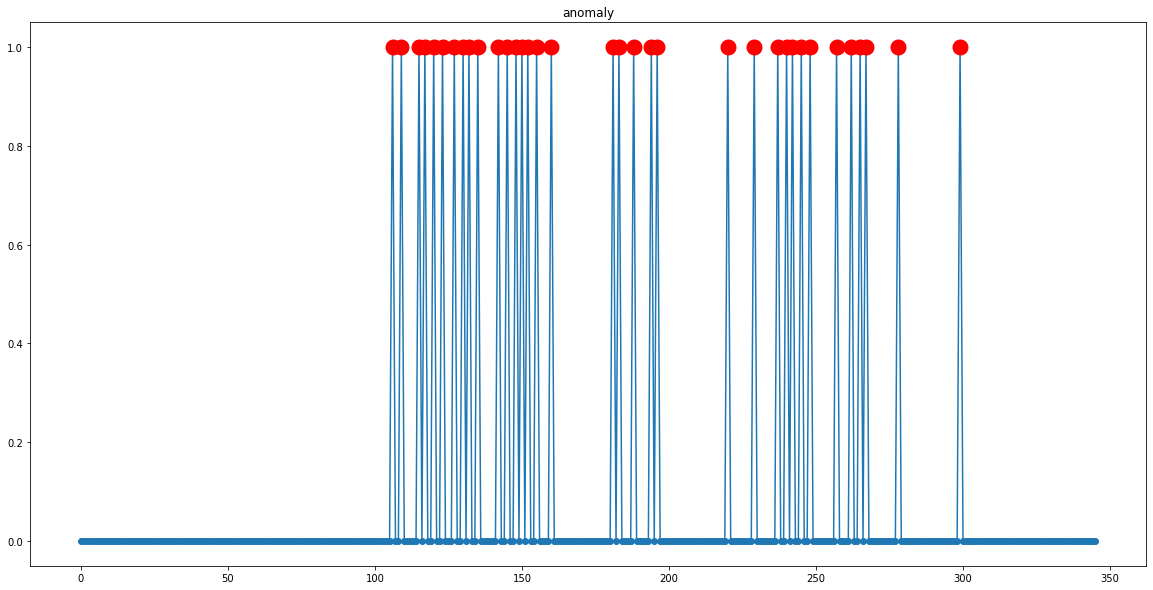

In [50]:
import os
import sys

import pyod
from pyod.models.knn import KNN
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from pyod.models.xgbod import XGBOD
from pyod.models.vae import VAE
col = ["SMS-in activity",
           "SMS-out activity",
           "Call-in activity",
           "Call-out activity",
           "Internet traffic activity"]
if __name__ == "__main__":
    contamination = 0.2  # percentage of outliers
    n_train = 200  # number of training points
    n_test = 100  # number of testing points

#     # Generate sample data
#     X_train, y_train, X_test, y_test = \
#         generate_data(n_train=n_train,
#                       n_test=n_test,
#                       n_features=2,
#                       contamination=contamination,
#                       random_state=42)
#     print(X_train.shape)
#     print(y_train.shape)
#     aaa
    # train kNN detector
    X_train = df[df["Square_id"]==1].iloc[:,3:7].values
    
    clf_name = 'KNN'
    clf = KNN(n_neighbors=100)
#     clf.fit(X_train)
    #clf = VAE(epochs=30, contamination=contamination, gamma=0.8, capacity=0.2)
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores
    dic = {col[0]:X_train[:,0],
           col[1]:X_train[:,1],
           col[2]:X_train[:,2],
           col[3]:X_train[:,3],
           'anomaly':y_train_pred
    }
    
    df_res = pd.DataFrame(dic)
    
    for i in range(0,5):
        plt.figure(figsize=(20,10))
        #plt.plot(tmp_df["cpu_usage"],marker="o",zorder=2)
        plt.plot(df_res.iloc[:,i],marker="o",zorder=2)
        plt.scatter(x=df_res[df_res["anomaly"]==1].index,y=df_res[df_res["anomaly"]==1][df_res.columns[i]],linewidths=10,c='red',zorder=3)
        plt.title("{}".format(df_res.columns[i]))
        #plt.savefig("./error_event_plot/usage_label")
        plt.show()
        #print(y_train_pred)
    
df_res.to_csv("Squareid_1_2013-11-01.csv")
    
#     # get the prediction on the test data
#     y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
#     y_test_scores = clf.decision_function(X_test)  # outlier scores

#     # evaluate and print the results
#     print("\nOn Training Data:")
#     evaluate_print(clf_name, y_train, y_train_scores)
#     print("\nOn Test Data:")
#     evaluate_print(clf_name, y_test, y_test_scores)

#     # visualize the results
#     visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
#               y_test_pred, show_figure=True, save_figure=True)

In [55]:
df.shape

(4842625, 8)